## Laboratorium 3 - algorytm *k* Najbliższych Sąsiadów (*k*NN)


### Opis
Celem laboratorium jest implementacja klasyfikatora *k* najbliższych sąsiadów - *k*NN (*k Nearest Neighbors*) oraz zapoznanie się z innymi metrykami klasyfikacji.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab03.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Dodatkowe narzędzia

Dopuszczalne jest korzystanie z bibliotek: `numpy`, `pandas`, `matplotlib`.
Implementacja klasyfikatora powinna być wykonana bez wykorzystania zewnętrznych bibliotek.


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* **Zaimplementuj klasyfikator *k* najbliższych sąsiadów (*k*NN)** i uruchom predykcję.
* Opisz jak zmieniają się wyniki klasyfikatora dla różnych wartości *k*, dla różnej liczby klas oraz dla różnej liczby cech.
* Wyświetl tablicę pomyłek (*confusion matrix*). W tym przypadku możesz zastosować gotową implementację z biblioteki `scikit-learn` <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html>.
* Odszukaj przynajmniej dwie inne (niż accuracy) metryki przytatne w klasyfikacji na stronie <https://scikit-learn.org/stable/modules/model_evaluation.html> i opisz ich wyniki. Wytłumacz czym się różnią i co można z nich odczytać.
* Opisz różnicę wyników klasyfikacji obu algorytmów (NN i *k*NN)?


> UWAGA: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.

### PONIŻEJ WYKONAJ ZADANIE

In [1]:
import numpy as np
import random
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import matplotlib.pyplot as plt


with open('dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

array([[5.00000000e+00, 4.00000000e+00, 9.36710000e-01, ...,
        3.99830000e-03, 3.72160000e-04, 1.30830000e+00],
       [5.00000000e+00, 6.00000000e+00, 9.09440000e-01, ...,
        2.89130000e-03, 2.93660000e-04, 1.16020000e+00],
       [2.00000000e+00, 1.00000000e+01, 8.41130000e-01, ...,
        4.45280000e-03, 6.55230000e-04, 1.65300000e+00],
       ...,
       [5.00000000e+00, 9.00000000e+00, 9.71130992e-01, ...,
        7.65297405e-03, 2.03654628e-04, 1.48339348e+00],
       [5.00000000e+00, 1.00000000e+01, 7.75259126e-01, ...,
        1.09847591e-02, 2.07598784e-04, 1.27284413e+00],
       [2.00000000e+00, 9.00000000e+00, 9.34909200e-01, ...,
        5.87599311e-04, 2.68828070e-04, 9.37008094e-01]])

In [8]:
def get_data(train,test,leaves):
    flag = True
    for i in leaves:
        if flag:
            train_new = train[(train[:, 0] == i)]
            test_new = test[(test[:, 0] == i)]
            flag = False
        else:
            train_next = train[(train[:, 0] == i)]
            test_next = test[(test[:, 0] == i)]
            train_new = np.vstack((train_new,train_next))
            test_new = np.vstack((train_new,train_next))
    return train_new,test_new

[[4.00000000e+00 3.00000000e+00 7.34290000e-01 ... 1.77730000e-03
  4.73780000e-04 1.33500000e+00]
 [4.00000000e+00 8.00000000e+00 5.30170000e-01 ... 2.78090000e-03
  4.88390000e-04 1.54520000e+00]
 [4.00000000e+00 1.00000000e+00 3.94320000e-01 ... 4.05970000e-03
  9.09770000e-04 1.88930000e+00]
 ...
 [5.00000000e+00 5.00000000e+00 8.57689969e-01 ... 8.25530965e-03
  2.85122905e-04 1.36499043e+00]
 [5.00000000e+00 9.00000000e+00 9.71130992e-01 ... 7.65297405e-03
  2.03654628e-04 1.48339348e+00]
 [5.00000000e+00 1.00000000e+01 7.75259126e-01 ... 1.09847591e-02
  2.07598784e-04 1.27284413e+00]]


In [2]:
def edist(p1, p2, features):
    p1_new = []
    p2_new = []
    distance = 0
    
    for i in features:
        p1_new.append(p1[i])
        p2_new.append(p2[i])
    
    for i in range(len(p1_new)):
        distance += (p1_new[i] - p2_new[i])**2
        
    return distance**0.5

In [16]:
print(test[0])
test[0][2:]

[3.1000e+01 4.0000e+00 9.9456e-01 9.7351e+00 9.0444e-01 9.3346e-01
 9.8421e-01 1.9638e-01 2.0897e-02 7.9479e-02 1.6599e-02 7.5247e-02
 5.6302e-03 1.9012e-03 4.4410e-05 4.8992e-01]


array([9.9456e-01, 9.7351e+00, 9.0444e-01, 9.3346e-01, 9.8421e-01,
       1.9638e-01, 2.0897e-02, 7.9479e-02, 1.6599e-02, 7.5247e-02,
       5.6302e-03, 1.9012e-03, 4.4410e-05, 4.8992e-01])

In [23]:
def k_nearest(train,test,features):
    classified = np.zeros((len(test), len(features)+1))
    for i in range(len(test)):
        nearest = 100
        for j in range (len(train)):
            distance = edist(test[i], train[j], features)
            if distance < nearest:
                nearest = distance
                classified[i] = [train[j][0],test[i][features[0]] ,test[i][features[1]]]
                print(classified)
#                 for feature in features:
#                     classified[i] = [train[j][0],test[i][features[0]] ,test[i][features[1]]]
                    
    return classified

feature = [4,8] 
k_nearest(feature)

[[3.6000e+01 9.0444e-01 2.0897e-02]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.       0.90444  0.020897]
 [0.       0.       0.      ]
 [0.       0.       0.      ]
 ...
 [0.       0.       0.      ]
 [0.       0.       0.      ]
 [0.       0.       0.      ]]
[[3.4000e+01 9.0444e-01 2.0897e-02]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[3.4000e+01 9.0444e-01 2.0897e-02]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.       0.90444  0.020897]
 [0.       0.       0.      ]
 [0.       0.       0.      ]
 ...
 [0.       0.       0.      ]
 [0.       0.       0. 

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3.4000e+01 9.1397e-01 8.2108e-02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
[[8.0000e+00 9.0444e-01 2.0897e-02]
 [3.5000e+01 5.2269e-01 1.0097e-02]
 [3

array([[8.00000000e+00, 9.04440000e-01, 2.08970000e-02],
       [3.50000000e+01, 5.22690000e-01, 1.00970000e-02],
       [3.40000000e+01, 9.13970000e-01, 8.21080000e-02],
       ...,
       [3.40000000e+01, 8.81590829e-01, 1.53941039e-02],
       [3.50000000e+01, 5.60630293e-01, 2.97831087e-02],
       [1.40000000e+01, 5.46916089e-01, 3.79772847e-05]])

In [12]:
# matplotlib_axes_logger.setLevel('ERROR')

# def show_plot(klasy, nazwy, feature):
#     color = []
#     for i in range(41):
#         color.append((random.randint(0,5)/5,random.randint(0,5)/5,random.randint(0,5)/5))

#     plt.figure(figsize=(15, 15), dpi=80)
#     plt.title("Predykcje")
#     plt.xlabel("Elongation")
#     plt.ylabel("Isoperimetric Factor")
#     for i in klasy:
#         plt.scatter(x=train[train[:,0] == i][:,feature[0]],
#                     y=train[train[:,0] == i][:,feature[1]],
#                     label='Train: '+ nazwy[i],
#                     c = color[i])
    
# #         plt.scatter(x=classified[classified[:,0] == i][:,1],
# #                     y=classified[classified[:,0] == i][:,2],
# #                     label='Pred: '+nazwy[i],
# #                     c = color[i],
# #                     marker ='+',
# #                     alpha=0.6)
#     plt.legend()

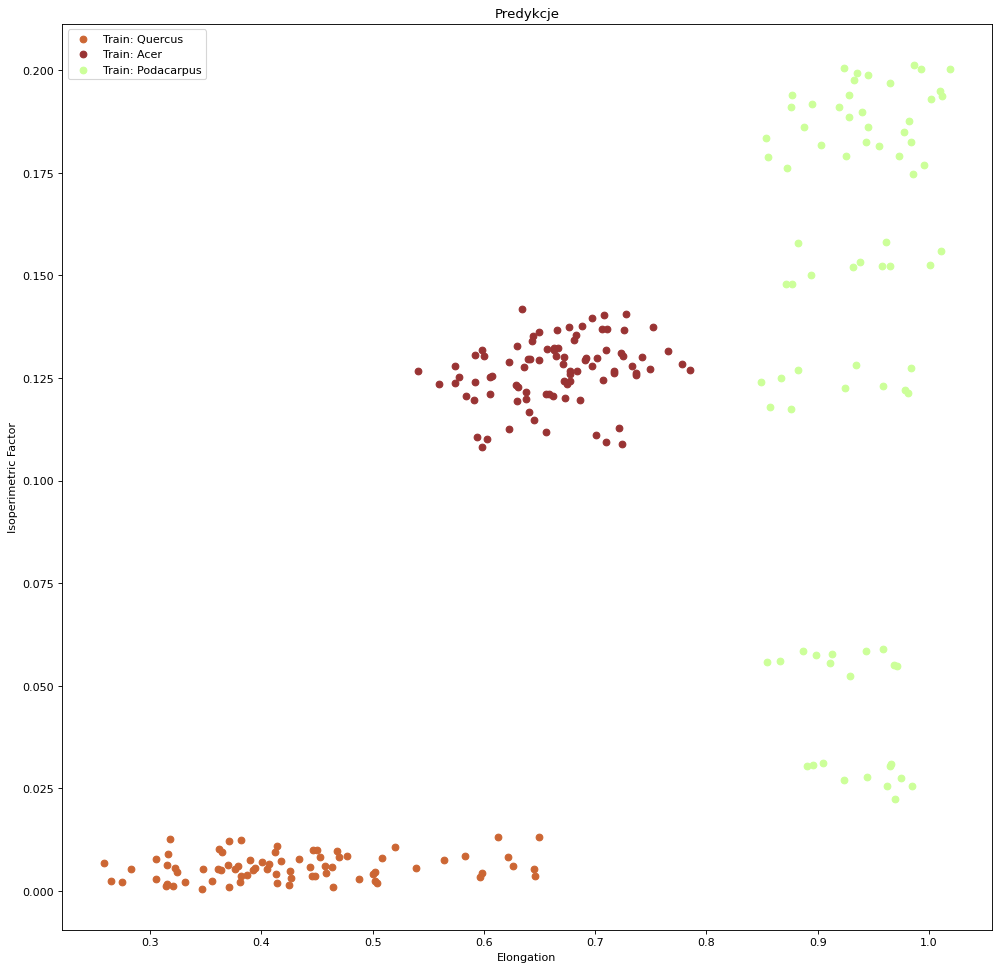

In [17]:
# klasy = [1,11,31]
# nazwy = {1: 'Quercus', 11: 'Acer',31: 'Podacarpus'} 
# feature = [4,8]  
# show_plot(klasy,nazwy,feature)